In [1]:
%matplotlib inline

# Introduction to Particle Filter
** AOE 5984 Final Project**<br/>
** Man Jun Koh ** <br />
** Kevin T. Croft Aerospace and Ocean Engineering, Virginia Tech**

This is a simple documentation/tutorial via Jupyter Notebook to show the basics of particle filter and its derivations. Particle filter is an advanced method for estimating non-linear and non-Gaussian systems since filtering method such as Kalman filter does not work in those cases. <br />

**Note:** Make sure to run the cells chronically otherwise the code won't work or the plots will look extremely unproportional. The best way I found was to navigate to the cell you want to run, then click `Run All Above` from the `'Cell' tab`. then run your cell `(Ctr + Enter)`. 



**Motivation: Why Particle Filter?**

It has been over 50 years since Kalman filter was invented. And today it is still known to be one of the most robust and revolutionary filtering methods. But just like everything in life, it has limitations especially when it comes to non-Gaussian/non-linear systems. Kalman filter uses linear Gaussian assumption and single Gaussians for the posterior density. While this makes the process simpler and faster, it is incapable of handling higher dimensional or turly non-Gaussian systems. In many systems today, it is becoming more and more important to include non-linearity and non-Gaussianity in order to accurately model the underlying dynamics of a physical system. Enter particle filter. 

Particle filter is also part of the Bayesian estimation. People also call it Sequential Monte Carlo method because it is a recursive Bayesian filter that uses Monte Carlo technique. The idea of particle filter is that the posterior probability density function (pdf) is represented as point masses (particles) with corresponding likelihoods (weights). In other words we generate a plethora of particles and send them to where we think the target is and estimate the state of the target using algorithms; then when the particles combined together, they make up the the posterior pdf. Because of such flexivity, particle filter has become on of the most popular techniques for estimating stochoastic systems. I know all this sounds like another language rn, but hopefully by the end you will have much better understanding.

Before diving straight into particle filtering, you have to know these few topics as prerequisites: a little bit of estimation basics, Bayesian inference, and some rudimentary knowledge of Kalman filter. The first two are briefly covered, but Kalman filter won't be since it is a lot of material. A lot of good resources online are out there and I suggest looking over before starting this document. 

# Estimation Basics 

**Definition** 

Estimation is a process of inferring the value of a quantity of interest from indirect, inaccurate and uncertain observations. 

Filtering 

There are two models required to perform the estimation: 

**I. State Space System/Dynamics Model**

This system describes how the state system is evolving with time including the process noise because it's a stochastic system.

Let $x_k$ be an $n_x$ dimensional state vector that describes the system:

$$x_{k+1}\ =\ f_k x_k + v_k\hspace{55pt} k = 0,1,...$$

and if there is no control input: 
$$ E \{v_k\}\ =\ 0,\ E\{v_k v_j\}\ =\ \delta _ {jk} Q_k\ $$

$f_k$: A known possibly nonlinear function of $x_k$<br />
$v_k$: Process noise. Usually zero mean and white<br />
$Q_k$: Process noise coavariance. <br/>
$k$: Current time step<br />

The state vector has all the information to describe the system. A good example of a state vector is a kinematic characteristics of a missile as a 6 x 1 vector containing position and velocity.

**II. Measurement Model**

Let $z_k$ be an $n_z$ dimensional known measurement model: 

$$ z_{k+1}\ =\ h_k x_k + w_k \hspace{55pt} k\ =\ 0,1,...$$

and

$$ E \{ w_k \}\ =\ 0,\ E \{w_k w_j\}\ =\ \delta_{jk} R_k\ $$

$h_k$: A known possibly nonlinear measurement function for the problem<br />
$w_k$: Measurement noise. Also usually zero mean and white<br />
$Q_k$: Measurement noise coavariance. <br/>
    
Example: A radar measurement that tracks the state ($x_k$) of the missile.

**Bayesian Estimation**

given data $Z^k\ =\ \{z_1,\dots,z_k\}$, we want to estimate the $x$ which can be defined as: <br />

$$\hat{x}_k\ =\ \hat{x}(k,Z^k) $$

and $\hat{x}_k$ is usally the approximation of conditional mean given the data which can be described as:

$$ \hat{x}_k\ \widetilde{=}\ E[x_k | Z^k] $$ 




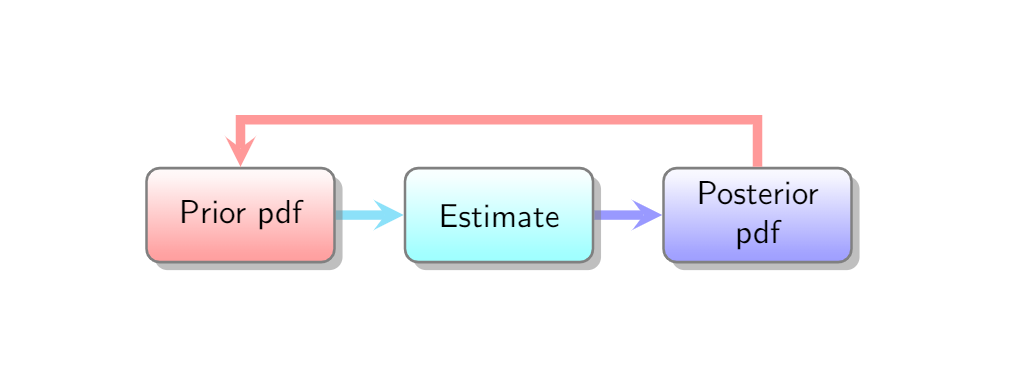
   
The standard Bayesian approach begins with a prior pdf, a belief about information before incorporating the data. using Bayes' rule, a posterior pdf can be obtained based on all available information, including the set of received measurement. Why is posterior pdf so important? Because the posterior pdf is the best description of the state and can be used to compute the state estimation $\hat{x}$.

Suppose the posterior pdf of the previous time step, $p(x_{k-1}|Z^{k-1})$ is known, then the prediction stage can evolve to the prior pdf at time step k shown below: 

$$p(x_{k}|Z_{k-1}) = \int p(x_k|x_{k-1})\ p(x_{k-1}|Z^{k-1})\ dx_{k-1}$$ <br />
known as the Chapman - Kolmogorov equation.

As mentioned previously, the posterior pdf at time step k can be computed using Bayes' rule: 

$$p(x_k|Z^k) = \frac{p(z_k|x_k)\ p(x_k|Z^{k-1})}{p(z_k|Z^{k-1})}\ =\ \frac{likelihood \times a\ priori}{marginal\ likelihood}$$


# General Approach to Particle Filter

Recall that particle filter is a recursive Bayesian filter using Monte Carlo technique. The posterior pdf is represented as particles with corresponding weights. That means that the posterior is an approximation. In this case approximation is better than finding the exact solution because the system is too complex.  
<img src="nongaussdistrib.PNG">
The figure above (K. Hsiao) is a good illustration of a non-Gaussian pdf $p(x)$ represented with particles $\chi_k ^i$ and weights $w_k ^i$. We can draw $N_s$ independent samples $\chi_k ^i$'s, which are $i$th particles at time step $k$ where each represents the value of the system state, and $w_k ^i$ which are the weight (likelihood) of each particle. 

For example, suppose we have no idea about the state of an object we are tracking; then we would have the generated particles to be scattered around the location where the object might be. A location with more particles and bigger weight would mean the object is more likely to be in that place. As mentioned earlier combination of those particles and weights would form the pdf we want to generate or to estimate from.

**Monte Carlo Technique** 

Suppose we want to evaluate the evaluate the expectation of the pdf to find the estimation: 

$$ E[f(x)]\ =\ \int\limits_{-\infty}^{\infty} f(x) p(x) dx\ \widetilde{=}\ \frac{1}{N_s} \sum\limits_{i = 1}^{N_s} f(\chi^i) $$

This integral is easy to perform analytically if the pdf is Gaussian. However, in most real life cases, pdf's are non-Gaussian and are extremely difficult or impossible to integrate analytically. That is where the Monte Carlo integration technique comes in. Monte Carlo technique can numerically integrate any arbitrary function, including non-integrable and noncontinuous functions.

# Monte Carlo Example: Computing $\pi$

A quick and solid example is estimating the value of $\pi$. This technique was developed by Stanley Ulam at Los Alamos National Laboratory. He couldn't calculate some nuclear reactions because he could not integrate analytically. 

As briefly shown in the equation above, the idea is simple. Integration is calculating the area under the curve. So you take the curve you wish to integrate, and put a bounding box around it. Then you generate random points that are positioned inside the bounding box and see how many of those points land under the curve. If the area of the bounding box is 1 and 70% of the points are under the curve then the approximation of that integral would be 0.7. And as you might intuitively think, more points means more accuracy of the integral. 

Now let's look at how we can compute $\pi$ using Python. The example below is taken from Kalman and Bayesian Filters in Python by Roger Labbe. The bounding box is a square with a length of two and we draw a circle inside with a radius of 1. 

The algorithm is simple: it generates 20000 samples random distribution anywhere inbetween -1 and 1  using numpy's `random.uniform` function then compute the distance from the origin using `numpy.linalg.norm` which calculates magnitude of a vector. 

Next, it creates a bool array to see if the distance of each point falls inside the circle

```python
in_circle = dist <= 1
```
Then the only thing left is to compute pi by taking the ratio of points that fell inside the circle and vice versa. The visual representation is also shown by scatter plotting those points.


mean pi(N=20000)= 3.1530
error  pi(N=20000)= -0.0114


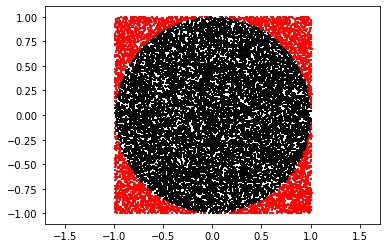

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import uniform 


N = 20000  # number of points
radius = 1.
area = (2*radius)**2

pts = uniform(-1, 1, (N, 2))

# distance from (0,0) 
dist = np.linalg.norm(pts, axis=1)
in_circle = dist <= 1

pts_in_circle = np.count_nonzero(in_circle)
pi = 4 * (pts_in_circle / N)

# plot results
plt.scatter(pts[in_circle,0], pts[in_circle,1], 
            marker=',', edgecolor='k', s=1)
plt.scatter(pts[~in_circle,0], pts[~in_circle,1], 
            marker=',', edgecolor='r', s=1)
plt.axis('equal')

print('mean pi(N={})= {:.4f}'.format(N, pi))
print('error  pi(N={})= {:.4f}'.format(N, np.pi-pi))

Pretty neat right? 

# Importance Sampling 

But there is another problem; when the system and its non-Gaussian pdf's are complex, it is also difficult or impossible to sample from $p(x)$ which is a required piece to perform the Monte Carlo technique. For example, what if the object we are tacking moves very differently than we predicted with our state model? we cant draw from the $p(x)$, let alone perform Monte Carlo Integration. Importance sampling allows us to draw a sample from a target pdf that is possibly unknown.

This is a very difficult concept to understand intuitively. you might question, how does importance sampling allow you to sample and compute the integral of a  target pdf? Let's get down to business and look how this scheme works mathematically. 

We are still going to use the same expectation integral equation, but we are going to tweak it a little bit by introducing $q(x)$: 

$$ E[f(x)] = \int\limits_{-\infty}^{\infty} f(x)\frac{p(x)}{q(x)} q(x) dx$$

$q(x)$ is called the importance density, or some also call it proposal distribution. It is statistically indepdent from our samples and we know the pdf. $q(x)$ could be drawn from uniform distribution, measurements, or even a prior estimate, but the important thing to note is that $q(x)$ is known. We can manipulate this equation to look like: 

$$ E[f(x)] = \int\limits_{-\infty}^{\infty} f(x)q(x)\ \  \frac{p(x)}{q(x)}\ \ dx$$

$\frac{p(x)}{q(x)}$ is the weight of the particle. Note that terms first start out as unnormalized form because we don't know the exact value; to avoid the confusion we will define unnormalized forms of $p(x)$ and $q(x)$ as $\tilde{p}(x)$ and $\tilde{q}(x)$ respectively. Then we can define both unnormalized and normalized weight of $i$th particle at time step $k$ can be described as:

$$ \tilde{w}_k ^i = \frac{\tilde{p}(\chi_k ^i)}{\tilde{q}(\chi_k ^i)},\quad w_k ^i = \frac{\tilde{w}_k ^i}{\sum\limits_{j = 1}^{N_s} \tilde{w}_k ^j} $$

Putting all the pieces back together to the original equation, the expectation integral can be approximated as: 
    $$ E[f(x)] = \int\limits_{-\infty}^{\infty} f(x) p(x) dx\ \widetilde{=}\ \sum\limits_{i = 1}^{N_s}  w_k ^i f(\chi_k ^i) $$

And the Important Sampling approximation of $p(x)$ can be written as: 

$$ p(x)\ =\ \sum\limits_{i = 1}^{N_s} w_k ^i \delta(x_k - \chi_k ^i) $$


# Importance Sampling Example: Estimating a Beta Distribution

Consider a Beta Distribution as our target pdf $p(x)$ with the x range from 0 and 1, and 2 and 11 as its shape parameters. Thanks to `scipy` library we can easily construct it with just a couple lines:

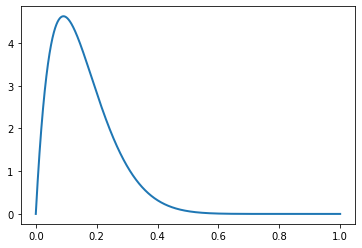

In [3]:
from scipy.stats import beta
x = np.linspace(0,1,20000)      # set the x range 
targetPdf = beta.pdf(x,2,11)    # construct the beta pdf
plt.plot(x,targetPdf,linewidth = 2)

We already know what the distribution looks like, but the goal is to estimate $p(x)$ by using Importance Sampling technique with a given  importance density $q(x)$, a distribution that we know and can sample from. $q(x)$ will be drawn from uniform distribution and we will use 20,000 samples. Before applying Importance Sampling, the pdf comparison looks like below: 

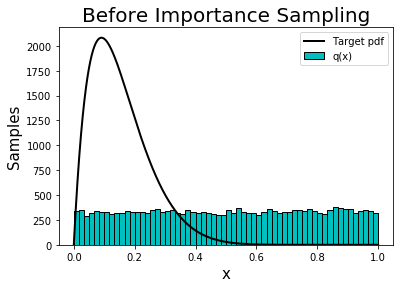

In [4]:
Ns = 20000                      # number of samples
qx = uniform(0,1,Ns)            # draw samples of importance density q as 
                                # uniform distribution 

# plot pre-Importance Sampling 
plt.hist(qx,60,color='c',edgecolor='k',label = 'q(x)')
plt.plot(x,targetPdf*450,linewidth = 2,color='k',label = 'Target pdf')

#plot lables 
plt.title('Before Importance Sampling',size=20)
plt.xlabel('x', fontsize=15)
plt.ylabel('Samples', fontsize=15)
plt.legend()


As you can see in the plot above $q(x)$ looks nothing like our target pdf $p(x)$. Now we can apply the Importance Sampling and see how the uniform distribution turns into a close estimation of $p(x)$.

We start with generating the initial weight distribution and uniformly distribute it across all samples. with the value of 1/Ns. We do that because when you initialize our assumption is that no particle is biased yet; similar to how we did with $q(x)$. Then we evaluate $f(\chi^i_k)$, recall that $\chi^i_k$ is the ith particle at time step k. In this case it would be samples from $q(x)$. Finally, we compute the normalized weights. 
We can apply the normalized weights to our original $q(x)$ to re-generate the distribution to how the post-Importance sampling estimation compares to the target pdf $p(x)$

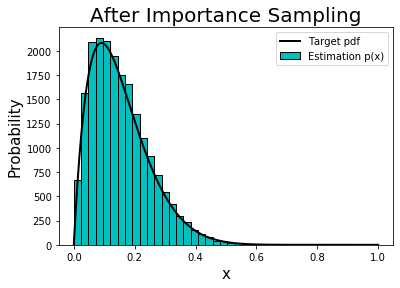

In [5]:
w_initial = 1/Ns;               # initial unnormalized weight in scalar 
                                # same for every distribution value    

# compute the weight distribution 
                                
fx = beta.pdf(qx,2,11)            # evaluate the f(x) integral part 
w_unnormal = fx / w_initial       # generate unnormalize weight distribution
w_normal = w_unnormal / np.sum(w_unnormal) # normalize the weight 

# generate the new pdf with the new weight distribution 
pdf_impSamp = np.random.choice(qx,Ns,replace=True,p=w_normal)

# plot post-Importance Sampling 
plt.hist(pdf_impSamp,30,color='c',edgecolor='k',label = 'Estimation p(x)')
plt.plot(x,targetPdf*450,linewidth = 2,color='k',label = 'Target pdf')


plt.title('After Importance Sampling', fontsize=20)
plt.xlabel('x', fontsize=15)
plt.ylabel('Probability', fontsize=15)
plt.legend()

Now our estimation looks much like our target pdf. To summerize, Importance Sampling is a very powerful technique that allows us to sample from pdf that is difficult to sample from or even is unknown. It generates particles from importance density, a known statistically independent pdf $q(x)$ and weigh those particles according to the true/target pdf. 

# SIS (Sequential Importance Sampling) Particle Filter

Now finally, let's apply the Importance Sampling into a particle filter. This is the most elementary particle filter and simple enough to get it started. Importance Sampling is 90% of this algorithm (hence the name). To reiterate, the main goal is to represent the required posterior pdf by a set of random samples with associated weights and to compute estimates based on these samples and weights. Remember all the variables from the Estimation Basics section? We are going to actually estimate a system using all the things we learned. Before that, there is a bit more of derivations using the estimation variables. I know this is a very hefty material, and derivations are all we've been doing, but you will understand the example much better knowing the foundation.

Set up the importance density q

$$q(x_0,\dots,x_k | Z^k) = q(x_k | x_0,\dots,x_k , Z^k)\ q(x_0,\dots,x_{k-1} | Z^{k-1})  $$

Then,

$$ p(x_0,\dots,x_k | Z^k)\ =\ p(z_k | x_k)\ p(x_k | x_{k-1})\ p(x_0,\dots,x_{k-1} | Z^{k-1})/ p(z_k | Z^{k-1}) $$

Given this formula and suggested form of q, the particle weight can  be:

$$w_k^i\ =\ \frac{p(z_k|\chi_k^i)p(\chi_k^i |\chi_{k-1}^i) p(\chi_0^i,\dots,\chi_{k-1}^i | Z^{k-1})}{q(\chi_k^i | \chi_0^i,\dots,\chi_{k-1}^i , Z^k) q(\chi_0^i,\dots,\chi_{k-1}^i)| Z^{k-1})} $$

$$=\ w_{k-1}^i\ \frac{p(z_k|\chi_k^i)p(\chi_k^i |\chi_{k-1}^i)} {q(\chi_k^i | \chi_0^i,\dots,\chi_{k-1}^i , Z^k)} $$

This allows us to develop a recursive form for particle weights. Also note that Importance Sampling Algorithm was designed that 

$$q(x_k | x_0,\dots,x_{k-1}, Z^k)\ =\ q(x_k | x_{k-1}, Z^k)$$

meaning that importance density becomes only dependent on $x_{k-1}$ and $z_k$, not the data with whole time history. Then the weight propagation can be written as: 

$$\bar{w}_k^i\ =\ w_{k-1}^i\ \frac{p(z_k|\chi_k^i)p(\chi_k^i |\chi_{k-1}^i)} {q(\chi_k^i | \chi_{k-1}^i , Z^k)}$$ (Unnormalized)

$$ w_k ^i\ = \frac{\bar{w}_k ^i}{\sum\limits_{j = 1}^{N_s} \bar{w}_k ^j} \qquad $$ (Normalized)

Now we can finally Compute the state estimation: 

$$ \hat{x}_k\ =\ \sum\limits_{i = 1}^{N_s} w_k ^i \chi_k^i $$

And the error covariance if needed:

$$ P_k\ =\ \sum\limits_{i = 1}^{N_s} w_k ^i [\chi_k^i - \hat{x}_k][\chi_k^i - \hat{x}_k]^T $$

# Example 

Take a look at this one dimensional, but extremely chaotic non-linear system:

$$x_{k+1} = f [ k , x_k , v_k ] = 2 \operatorname { atan } [ x_k ] + 0.5 * \cos ( \pi k / 3 ) + v_k$$

$$z_k = h [ k , x_k ] + w_k = x_k + x_k ^ { 2 } + x_k ^ { 3 } + w_k$$

$$E \{ v_k \} = 0 , E \{ v_k v_j \} = \delta _ { j k } Q_k\ where\ Q_k = 1$$

$$E \{ w_k \} = 0 , E \{ w_k w_j \} = \delta _ { j k } R_k\ where\ R_k= 0.25$$

$$\quad \hat { x }_0 = 4 , P_0 = 2$$

This example is from one of the classes I took taught by Dr. Mark Psiaki. This is a great example to apply the particle filter on. As shown above, The system is chaotic with two stable equilibria at $x = \pm \ 2.31122$. The sinusoidal behavior and random process noise cause extremely unpredictable jumps between the two equilibria.The measurement function $h[k,x_k]$ is also very non-linear. $\frac{\partial h}{\partial x}$ is small near $x = 0$. which is where the most uncertainty about the jumps occurs.

Lets start with the two estimation models state dynamics model $f(x_k,v_k)$ and measurement model $h(x_k)$. 


In [6]:
# compute f the state space/dynamics model 
def dynamics_model(xk,vk,k):

    atanxk = np.arctan(xk)
    pi = np.pi
    f = 2*atanxk + 0.5*np.cos(pi*k/3) + vk
    
    return f

In [7]:
# compute h the measurement model 
def measurement_model(xk,Rk,k):

    oneoversqrtRk = 1/np.sqrt(Rk)
    h = oneoversqrtRk * (xk**3 + xk**2 + xk)

    return h

So far pretty simple. Before we spin the wheels with particle filter, we want to generate the truth state first so we can compare each other in the future and measure the filter accuracy. the function below is considered as a truth state simulator because you manually add the process noise variable `vkhist` using the given process noise covariance `Qk`. With the noisy measurement `zk` the variable was normalized by using `1/np.sqrt(Rk)` because this process makes the measurement noise zero mean. 

**Note:** whenever there is a `hist` added to a variable that means it's a vector that stores all the values through out the time steps k. 


In [8]:
    # initialize the given variables 
    Qk = 1            # process noise covariance matrix at time step k
    P0 = 2            # initial a posteriori state estimation error covariance matrix
    Rk = 0.25         # measurement noise covariance matrix at time step k
    xhat0 = 4         # initial a posteirori state estimate 
    K = 100           # number of time steps (history) 
    Ns = 500          # number of particles 
    # This function computes truth simulation of both dynamics and measurement model
    # through out the given time history
    # 
    
    from numpy.random import randn     # random standard normal distribution 
    
    def tru_simulation(xhat0,P0,Q,R,Ns):

        # initialize the variables 
        vkhist = np.sqrt(Q)*randn(Ns,1)
        xkhist = np.zeros((Ns+1,1))
        zkhist = randn(Ns,1)
        
        # initialize the truth state vector with xhat0 and error covariance
        xkhist[0,0] = xhat0 + np.sqrt(P0)*randn(1,1)

        for k in range(0,Ns):
            kp1 = k + 1

            # compute the truth state for each model 
            xkhist[kp1,0] = dynamics_model(xkhist[k, :], vkhist[k, :], k)
            zkperfect = measurement_model(xkhist[k, :],R,k)

            # update the measurement model 
            zkhist[k,:] = zkperfect + zkhist[k,:]

        return xkhist, zkhist

Let's run this simulation to see what the truth state through 100 times steps looks like.

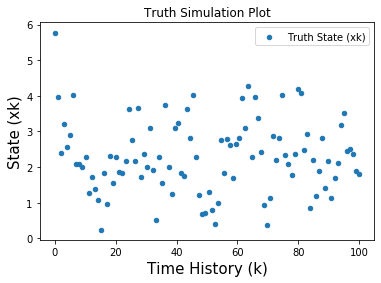

In [9]:
xkhist_tru, zkhist_tru = tru_simulation(xhat0,P0,Qk,Rk,K)

# plot the result 
plt.scatter(np.linspace(0, 100, 100), xkhist_tru[0:-1, 0],s=20, label = 'Truth State (xk)')
plt.title('Truth Simulation Plot')
plt.xlabel('Time History (k)', fontsize=15)
plt.ylabel('State (xk)', fontsize=15)
plt.legend()


As you already have predicted by looking at the equations, the plot is very funky. If you haven't tried try to run it multiple times, and you can see that the plots drastically change every time you run it.

The truth states are generated, and now we are going to construct our own state estimation via SIS particle filter and compare by plotting them together. First we have to initialize the variables as our first step. Below function shows the initialization and what kind of data we need to run the filter. <br/>
I used a dictionary so that way it's easier to see which variables are which and just pass the whole dict as an argument when running functions. 

In [10]:
def intializeData():
    pfData = {}
    pfData['current time step'] = 0                 # k
    pfData['number of particles'] = 500             # Ns
    pfData['state estimation'] = xhat0              # xhat0
    pfData['error covariance'] = 2                  # P0
    pfData['process noise covariance'] = 1          # Q0
    pfData['next measurement'] = zkhist_tru[0,:]
    pfData['measurement noise covariance'] = 0.25   # R0
    pfData['particle matrix'] = np.nan              # chi0 
    pfData['particle weight'] = np.nan              # wk0
    pfData['resample threshold'] = 40

    return pfData

** Steps of SIS **

Now we will look at step by step on how SIS filter works. Note that this code uses a bit of Kalman filter knowledge to solve for some variables, but I don't expect all readers to understand all that. The goal is to have a general idea, and understand the each steps of algorithm below without Kalman filter details.

Algorithm is for 1 iteration:

**FOR** i = 1 to $N_s$: 

**1)** draw the particles $\chi^i_{k+1}$ from importance density $q(x)$ <br/>
  - In this case $q(x)$ will be our a priori distribution from the previous timestep. 

**2)** Assign unnormalized particle weight $\bar{w}_{k+1}^i$: 

**END FOR**

**3)** Compute the normalize the weight $w_{k+1}^i$: 

**4)** Compute the estimations $\hat{x}_{k+1}$ and $P_{k+1}$: 

When you implement the algorithm into a code:


In [11]:
# This function calculates one iteration of SIS particle filter
def SIS_singleIter(data):

    # extract the variables from the data dict 
    k = data['current time step']               # int 
    Ns = data['number of particles']            # int
    xhatk = data['state estimation']            # nx x 1
    Pk = data['error covariance']               # nx x nx 
    Qk = data['process noise covariance']       # nv x nv
    zkp1 = data['next measurement']             # nz x 1
    Rk = data['measurement noise covariance']   # nz x nz 
    chikmat = data['particle matrix']           # Ns x Nx 
    wk = data['particle weight']                # Ns x 1

    # obtain the variable sizes
    Nx = 1
    Nz = 1
    Nv = 1

    # initialize the filter if time step (k) is at 0 other wise skip
    if k == 0: 
        # obtain square root of covariance by taking cholesky factorization 
        if np.ndim(Pk) == 0:
            Sxk = np.sqrt(Pk)
        else:
            Sxk = np.linalg.cholesky(Pk)
        
        #######################
        # STEP 1 of algorithm #
        #######################
        
        # draw particles and initialize the weight 
        chikmat = xhatk + Sxk*randn(Ns,Nx)
        wk = (1/Ns) * np.ones((Ns,1))

    # compute square roots of covariance 
    if np.ndim(Qk) == 0:
        Svk = np.sqrt(Qk)
        invRkp1 = 1/Rk
    else:
        Svk = np.linalg.cholesky(Qk)
        invRkp1 = np.linalg.inv(Rk)
    
    # generate particles for process noise covariance 
    vkmat = Svk * randn(Ns,Nv)

    # particle propagation 
    chikp1mat = np.zeros((Ns,Nx))
    Zkp1mat = np.zeros((Ns,Nz))
    logwbarkp1 = np.zeros((Ns,1))
    logwk = np.log(wk)

    for i in range(0,Ns):
        # measurement prediction for particles 
        chikp1mat[i,:] = dynamics_model(chikmat[i,:],vkmat[i,:],k)
        zbarkp1i = measurement_model(chikp1mat[i,:],Rk,k+1)
        Zkp1mat[i,:] = zbarkp1i

        #######################
        # STEP 2 of algorithm #
        #######################
        
        # compute natural log of weights 
        nukp1i = zkp1 - zbarkp1i
        logwbarkp1[i,:] = logwk[i,:] - 0.5 * np.transpose(nukp1i)*invRkp1*nukp1i

    #######################
    # STEP 3 of algorithm #
    #######################
    
    # normalize the weights 
    logWbarMax = np.amax(logwbarkp1)
    wDoubleBarKp1 = np.exp(logwbarkp1-logWbarMax)
    sumWDoulbeBar = np.sum(wDoubleBarKp1)
    oneOverSumWDoubleBar = 1 / sumWDoulbeBar
    wkp1 = oneOverSumWDoubleBar * wDoubleBarKp1

    #######################
    # STEP 4 of algorithm #
    ####################### 
    
    # update state estimation
    wkp1TimesChikp1 = np.multiply(wkp1,chikp1mat) 
    xhatkp1 = np.sum(wkp1TimesChikp1)

    # update A Posteriori Error Covariance
    chikp1MinusxhatMat = chikp1mat - xhatkp1
    Pkp1 = np.zeros((Nx,Nx))

    for i in range(0,Ns):
        Pkp1 = Pkp1 + wkp1[i,:] * chikp1MinusxhatMat[i,:] * np.transpose(chikp1MinusxhatMat[i,:])
    
    return xhatkp1, Pkp1, chikp1mat, wkp1

Now let's run this 100 times to see if our estimates are good or bad. We will use 500 particles.



/home/junniboi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log


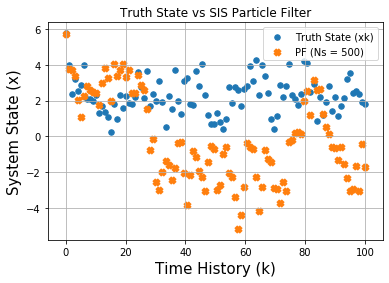

In [12]:
# This function computes all given iterations of particle filter either SIS or Generic
def SIS_multiIter(zkhist_tru):

    xhathist = np.zeros((K, Nx))
    Phist = np.zeros((Ns, Nx, Nx))
    pfData = intializeData()

    for k in range(0,K):

        kp1 = k + 1
        # pass in the current measurement 
        pfData['next measurement'] = zkhist_tru[k, :]
        xhatkp1, Pkp1, chikp1mat, wkp1 = SIS_singleIter(pfData)

        # store the estimation
        xhathist[k,:] = xhatkp1
        Phist[k,:,:] = Pkp1

        # iterate 
        pfData['state estimation'] = xhatkp1
        pfData['error covariance'] = Pkp1
        pfData['particle matrix'] = chikp1mat
        pfData['particle weight'] = wkp1
        pfData['current time step'] = kp1
    
    return xhathist, wkp1

def plotResult(xhathist,xhist_tru,pf_type,label,figureNum):
    # set up the plot layout 
    #plt.figure(figureNum)
    #plt.rcParams.update({'font.size': 35})
    #ax = plt.gca()
    #ax.tick_params(axis='both', which='major', labelsize=24)

    # plot the result 
    plt.scatter(np.linspace(0, 100, 100), xkhist_tru[0:-1, 0],s=30, label = 'Truth State (xk)')
    plt.scatter(np.linspace(0, 100, 100), xhathist[:, 0], marker = 'x', linewidth = 4,s=30, label = label)#'PF (Ns = 500, Nt = 40)')
    plt.title('Truth State vs ' + pf_type)
    plt.xlabel('Time History (k)', fontsize=15)
    plt.ylabel('System State (x)', fontsize=15)
    plt.legend()
    plt.grid(True)

    return plt


if __name__ == '__main__':
    
    # obtain the variable sizes
    Nx = 1
    Nz = 1
    Nv = 1
    
    # Run the particle filter for given iteration K 
    xhathistSIS, wkp1SIS = SIS_multiIter(zkhist_tru)
    
    plt1 = plotResult(xhathistSIS, xkhist_tru,'SIS Particle Filter', 'PF (Ns = 500)',1)

**Issues with SIS** 

**1. Degeneracy**

As you could clearly see, that is one bad estimation. The estimated particles missed almost all truth states. It was accurate for only for the first 2-3 iterations of given time history. This problem is called degeneracy. After a few iterations all particles weights collapse except one, meaning all but one particles weight become very close to 0. The variance of importance weights only increase over time, so that means it is impossible to avoid this phenomenon. Below shows the weight distribution 


In [13]:
print(Ns)

500


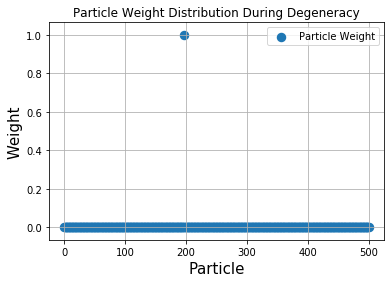

In [14]:
# Plot the weight distribution along the particles for degeneracy example 

plt.scatter(np.linspace(0,500,500),wkp1SIS,marker = 'o', linewidth = 4,s=30, label = 'Particle Weight')
plt.title('Particle Weight Distribution During Degeneracy')
plt.xlabel('Particle', fontsize=15)
plt.ylabel('Weight', fontsize=15)
plt.grid(True)
plt.legend() 

As you can see from the plot above, one particle has all the weight and the other 499 particles weights went to 0. Once degeneracy occurs, the filter is no longer reliable which is most cases for SIS .

# Resampling 

One of the solutions is to resample. The idea is to resample from the distrbution $p[x_k | Z^k]$ every time degeneracy occurs. Particles with more weights (likelihood) gets sampled more than once. The bottom tier particles are eliminated. Finally generates new set of $\chi_k^i$ by resampling $N_s$ times fromapproximate discrete representation of $p(x_k | z_1,\dots,z_k)$ 

The function below shows how to resample. 

In [15]:
def resample(chikp1mat,wkp1,Ns,Nx):
    
    # construct the CDF, c0 is zero
    cVec = np.zeros((Ns,1))
    for i in range(1,Ns):
        cVec[i,0] = cVec[i-1,0] + wkp1[i,:]
    
    # draw starting point - sample eta from uniform distribution 
    oneOverNs = 1/Ns
    eta1 = oneOverNs * uniform(0,1)
    
    # For each eta(j), find i such that c(i) <= eta(j) < c(i+1)
    chikp1matNew = np.zeros((Ns,Nx))
    jVec = np.zeros((Ns,1))
    
    # move along the cdf 
    for j in range(0,Ns):
        etaj = eta1 + j * oneOverNs
        i = 0
        while etaj > cVec[i,0] and i < Ns-1:
            i = i+1
        
        jVec[j,0] = i
        chikp1matNew[j,:] = chikp1mat[i,:].copy() 
    
    # normalize the weights again
    chikp1mat = chikp1matNew.copy()
    wkp1 = oneOverNs * np.ones((Ns,1))

    return chikp1mat, wkp1

The key features of this algorithm is that high weight particles get sampled multiple times and low weight particles get eliminated. he algorithm not only prevents degeneracy, but also  decreases loss of diversity of particles by always sampling $\chi_k^i$ with $w_k^i \geq \frac{1}{N_s}$. The particles remain diverse because the resampling occurs after the weight propagation.

# Generic Particle Filter 

Now we are at the final stage. There were a lot of materials in which most are hard to consume at once, but this is the complete form of a basic particle filter. We are going to combine all the improvements we made to create a more robust particle filter with more details. 

** Effective Number of Particles**

Let $N_{eff}$ be the effective number of particles:
    $$N_{eff}\ =\ \frac{1}{\sum\limits_{i=1}^{N_s} w_k ^i},\quad where\quad 1 < N_{eff} < N_s$$
    
Small $N_{eff}$ means degeneracy, so we want to set a certain threshold $N_T$ and resample every time $N_{eff} < N_T$

Below is the code for single iteration of generic particle filter. It is similar to SIS, but now with resampling and particle threshold `Nt`

In [16]:
def generic_pf(data,resampleFlag):

    # extract the variables from the data dict 
    k = data['current time step']               # int 
    Ns = data['number of particles']            # int
    xhatk = data['state estimation']            # nx x 1
    Pk = data['error covariance']               # nx x nx 
    Qk = data['process noise covariance']       # nv x nv
    zkp1 = data['next measurement']             # nz x 1
    Rk = data['measurement noise covariance']   # nz x nz 
    chikmat = data['particle matrix']           # Ns x Nx 
    wk = data['particle weight']                # Ns x 1
    Nt = data['resample threshold']             # int
    
    # obtain the variable sizes
    Nx = 1#len(xhatk)
    Nz = 1#len(zkp1)
    Nv = 1#len(Qk)

    # initialize the filter if time step (k) is at 0 other wise skip
    if k == 0: 
        # obtain square root of covariance by taking cholesky factorization 
        if np.ndim(Pk) == 0:
            Sxk = np.sqrt(Pk)
        else:
            Sxk = np.linalg.cholesky(Pk)
        
        chikmat = xhatk + Sxk*randn(Ns,Nx)
        wk = (1/Ns) * np.ones((Ns,1))

    # compute square roots of covariance 
    if np.ndim(Qk) == 0:
        Svk = np.sqrt(Qk)
        invRkp1 = 1/Rk
    else:
        Svk = np.linalg.cholesky(Qk)
        invRkp1 = np.linalg.inv(Rk)

    # generate particles for process noise covariance 
    vkmat = Svk * randn(Ns,Nv)

    # particle propagation 
    chikp1mat = np.zeros((Ns,Nx))
    Zkp1mat = np.zeros((Ns,Nz))
    logwbarkp1 = np.zeros((Ns,1))
    logwk = np.log(wk)

    for i in range(0,Ns):
        # measurement prediction for particles 
        chikp1mat[i,:] = dynamics_model(chikmat[i,:],vkmat[i,:],k)
        zbarkp1i = measurement_model(chikp1mat[i,:],Rk,k+1)
        Zkp1mat[i,:] = zbarkp1i

        # compute natural log of weights 
        nukp1i = zkp1 - zbarkp1i
        logwbarkp1[i,:] = logwk[i,:] - 0.5 * np.transpose(nukp1i)*invRkp1*nukp1i

    # normalize the weights 
    logWbarMax = np.amax(logwbarkp1)
    wDoubleBarKp1 = np.exp(logwbarkp1-logWbarMax)
    sumWDoulbeBar = np.sum(wDoubleBarKp1)
    oneOverSumWDoubleBar = 1 / sumWDoulbeBar
    wkp1 = oneOverSumWDoubleBar * wDoubleBarKp1

    # update state estimation
    wkp1TimesChikp1 = np.multiply(wkp1,chikp1mat) 
    xhatkp1 = np.sum(wkp1TimesChikp1)

    # update A Posteriori Error Covariance
    chikp1MinusxhatMat = chikp1mat - xhatkp1
    Pkp1 = np.zeros((Nx,Nx))

    for i in range(0,Ns):
        Pkp1 = Pkp1 + wkp1[i,:] * chikp1MinusxhatMat[i,:] * np.transpose(chikp1MinusxhatMat[i,:])

    # Resample if degeneracy (N_eff < Nt occurs)
    wkp1Squared = np.square(wkp1)
    Neff = np.sum(wkp1Squared)
    if resampleFlag:
        if Neff < Nt: 
            chikp1mat,wkp1 = resample(chikp1mat,wkp1,Ns,Nx)

    
    return xhatkp1, Pkp1, chikp1mat, wkp1



Let's plot this to see how much improvement we have made. 

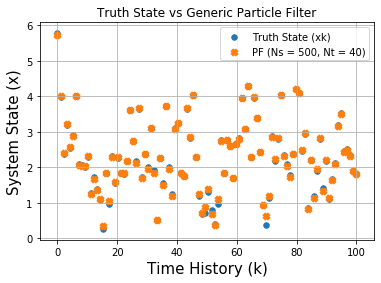

In [17]:
# This function computes all given iterations of particle filter either SIS or Generic
def pf_MultiStep(zkhist_tru,resampleFlag):

    xhathist = np.zeros((K, Nx))
    Phist = np.zeros((Ns, Nx, Nx))
    pfData = intializeData()

    for k in range(0,K):

        kp1 = k + 1
        # pass in the current measurement 
        pfData['next measurement'] = zkhist_tru[k, :]
        xhatkp1, Pkp1, chikp1mat, wkp1 = generic_pf(pfData,resampleFlag)

        # store the estimation
        xhathist[k,:] = xhatkp1
        Phist[k,:,:] = Pkp1

        # iterate 
        pfData['state estimation'] = xhatkp1
        pfData['error covariance'] = Pkp1
        pfData['particle matrix'] = chikp1mat
        pfData['particle weight'] = wkp1
        pfData['current time step'] = kp1
    
    return xhathist, wkp1

# Run the generic particle filter, True means you are resmapling 
xhathistGeneric, wkp1Generic = pf_MultiStep(zkhist_tru,True)
plt2 = plotResult(xhathistGeneric, xkhist_tru,'Generic Particle Filter', 'PF (Ns = 500, Nt = 40)',2)

Just by preventing degeneracy via resampling, the result is exceptionally better, and the filter predicted most of them accurately. 

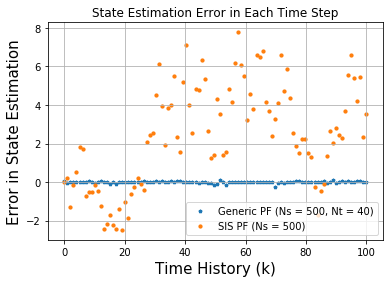

In [18]:
# Plot the error comparison for each time iteration 
xkhist_tru = xkhist_tru[0:-1, 0] 
xtildkhist_generic = xkhist_tru - xhathistGeneric[:,0] 
xtildkhist_SIS = xkhist_tru - xhathistSIS[:,0] 
plt.title('State Estimation Error in Each Time Step')
plt.scatter(np.linspace(0, 100, 100), xtildkhist_generic, marker = '*', linewidth = 2,s=5, label = 'Generic PF (Ns = 500, Nt = 40)')
plt.scatter(np.linspace(0, 100, 100), xtildkhist_SIS, marker = 'o', linewidth = 2,s=5, label = 'SIS PF (Ns = 500)')
plt.xlabel('Time History (k)', fontsize=15)
plt.ylabel('Error in State Estimation', fontsize=15)
plt.grid(True)
plt.legend()  

This plot shows a better visual representation of how accurate the generic particle filter is. 

** Diversity Is Still an Issue**

Even with Resampling diversity issues don't fully go away. The reason is that in the resampling stage, samples are drawn from a discrete distribution rather than a continuous one. If this problem is not addressed properly, it may lead to particle collapse. There is a solution method called regularized particle filter. regularized PF deals with lack of particle diversity and too large of weight on a single particle. It won't be covered for now, but I may or may not add on to this documentation in the future. 


# Conclusions

If assumptions of the Kalman filter hold, then no other algorithm can out-perform them. However, those assumptions in many other real life situations do not hold. Particle filter approximates the posterior density as a finite number of samples. If the system is non-Gaussian and multi-modal PF is the optimal choice. It is critical to choose a good important density and implement the resampling scheme whenever being close to degeneracy.

# References 

[1] M. Sanjeev Arulampalam, S. Maskell, N. Gordon, and T. Clapp.A Tutorialon Particle Filters for Online Nonlinear/Non-Gaussian Bayesian Tracking.IEEE, Feb 2002.

[2] R. Labbe. Kalman and Bayesian Filters in Python.https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python,2015

[3] M. Psiaki.AOE 6984:  Model Based Estimation Lecture Notes. VirginiaTech. Dec 2018

[4] Y. Bar-Shalom, X. Rong Li, and T. Kirubarajan.Estimation withApplications to Tracking and Navigation. John Wiley and Sons, Inc., 2001.

[5] K. Hsiao, H. Plinval-Salgues, J. Miller.Particle Filters and TheirApplications. MIT, Apr 11 2005.

[6] B. Ristic, M. Sanjeev Arulampalam, and N. Gordon.Beyond the KalmanFilter. Particle Filters for Tracking Applications.. Artech House, Dec 2003.